In [ ]:
import numpy as np
from sklearn import datasets
import pandas as pd


# Step 1: Load Iris data
iris = datasets.load_iris()
data = iris.data
unlabeled_data = pd.DataFrame(data=iris.data, columns = iris.feature_names)

# Display the unlabeled dataset
print("Unlabeled Iris Dataset:")
print(unlabeled_data.head())

Unlabeled Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
# Compute the covariance matrix.
def compute_covariance_matrix(X):
    n = data.shape[0]
    mean_vec = np.mean(X, axis=0)
    centered_matrix = X - mean_vec
    covariance_matrix = (centered_matrix.T @ centered_matrix) / (n - 1)
    return covariance_matrix

covariance_matrix = compute_covariance_matrix(unlabeled_data)


In [ ]:
def pca (data,nofcomp):
  mean_vector = np.mean(unlabeled_data, axis=0)
  standardized_data = unlabeled_data - mean_vector
  covariance_matrix = compute_covariance_matrix(standardized_data)
  eigenvalues1, eigenvectors1 = np.linalg.eig(covariance_matrix)
  sorted_eigenVectors = eigenvectors1[:, eigenvalues1.argsort()[::-1]]
  principal_components = sorted_eigenVectors[:, :nofcomp]
  x_meaned = data - np.mean(data, axis=0)
  data_pca = np.dot(x_meaned, principal_components)

  mean_array = np.mean(data, axis=0)
  mean_reshaped = mean_array.values.reshape(1, -1)

    # Reconstruct data
  reconstructed = np.dot(data_pca, principal_components.T) + mean_reshaped

  return reconstructed

In [ ]:
pca = pca(unlabeled_data, 2)
print(pca)

[[5.08303897 3.51741393 1.40321372 0.21353169]
 [4.7462619  3.15749994 1.46356177 0.24024592]
 [4.70411871 3.1956816  1.30821697 0.17518015]
 [4.6422117  3.05696697 1.46132981 0.23973218]
 [5.07175511 3.52655486 1.36373845 0.19699991]
 [5.50581049 3.79140823 1.67552816 0.32616959]
 [4.76528947 3.23041102 1.35723837 0.19551776]
 [5.00155648 3.39859911 1.47993231 0.2460815 ]
 [4.42052031 2.87903672 1.3855842  0.20882514]
 [4.80273233 3.20016781 1.48805402 0.2503016 ]
 [5.36090126 3.74023124 1.4985348  0.25243081]
 [4.90879014 3.28892521 1.51717562 0.26209953]
 [4.6820989  3.12115258 1.41198408 0.21884697]
 [4.34251794 2.95641673 1.08492393 0.08287986]
 [5.66151963 4.14156276 1.28795452 0.16277348]
 [5.85960752 4.23600886 1.48196707 0.24344301]
 [5.4275086  3.87100742 1.36995112 0.19816072]
 [5.09103106 3.50887425 1.43521594 0.22693854]
 [5.62144408 3.88058108 1.72215216 0.34527869]
 [5.24526768 3.65105838 1.4519108  0.23332171]
 [5.26539106 3.53834771 1.71102272 0.3420543 ]
 [5.20837272 

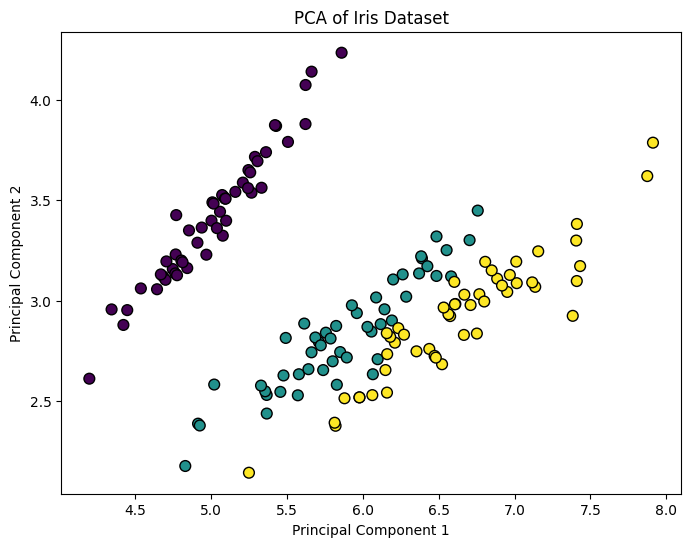

In [ ]:
import matplotlib.pyplot as plt

# Visualize the transformed data in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca[:, 0], pca[:, 1], c=iris.target, cmap='viridis', edgecolor='k', s=60)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
def Q_Matrix(data,nofcomp):
   normalized_data = unlabeled_data - np.mean(unlabeled_data, axis=0)
   covariance_matrix = compute_covariance_matrix(normalized_data)
   eigenvalues1, eigenvectors1 = np.linalg.eig(covariance_matrix)
   sorted_eigenvectors = eigenvectors1[:, eigenvalues1.argsort()[::-1]]
   mean_array = np.mean(data, axis=0)
   mean_reshaped = mean_array.values.reshape(1, -1)
   #define variables
   tol = 0.0001
   Perror = 1e6
   Bnum_components = 1
   q_matrix = []
    # Iteratively find the best number of components and associated Q matrix
   for num_components in range(1, nofcomp + 1):
        principal_components = sorted_eigenvectors[:, :num_components]

        # Project data onto the selected principal components
        data_pca = np.dot(normalized_data, principal_components)

        # Reconstruct the original data from the projected data
        reconstructed = np.dot(data_pca, principal_components.T) + mean_reshaped

        # Calculate the mean squared error between the original and reconstructed data
        error = np.mean(np.square(data - reconstructed))
        print(f'Error: {error}, Difference Error: {Perror - error}')

        # Check if the difference in error is greater than the tolerance
        if np.any(Perror - error > tol):
            best_num_components = num_components
            q_matrix = principal_components.copy()
        else:
            # If the difference in error is not greater than the tolerance, stop the loop
            break

        prev_error = error
   return Bnum_components, q_matrix





In [ ]:
best_num_components , q_matrix = Q_Matrix(unlabeled_data , 100)
print("The Q-Matrix is " , q_matrix)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

Error: sepal length (cm)    0.132594
sepal width (cm)     0.158707
petal length (cm)    0.013148
petal width (cm)     0.037967
dtype: float64, Difference Error: sepal length (cm)    999999.867406
sepal width (cm)     999999.841293
petal length (cm)    999999.986852
petal width (cm)     999999.962033
dtype: float64
Error: sepal length (cm)    0.028674
sepal width (cm)     0.030194
petal length (cm)    0.005903
petal width (cm)     0.036594
dtype: float64, Difference Error: sepal length (cm)    999999.971326
sepal width (cm)     999999.969806
petal length (cm)    999999.994097
petal width (cm)     999999.963406
dtype: float64
Error: sepal length (cm)    0.002357
sepal width (cm)     0.002420
petal length (cm)    0.005451
petal width (cm)     0.013448
dtype: float64, Difference Error: sepal length (cm)    999999.997643
sepal width (cm)     999999.997580
petal length (cm)    999999.994549
petal width (cm)     999999.986552
dtype: float64
Error: sepal length (cm)    7.888609e-32
sepal width

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/


Error: sepal length (cm)    7.888609e-32
sepal width (cm)     6.629719e-31
petal length (cm)    7.724263e-32
petal width (cm)     7.854199e-32
dtype: float64, Difference Error: sepal length (cm)    1000000.0
sepal width (cm)     1000000.0
petal length (cm)    1000000.0
petal width (cm)     1000000.0
dtype: float64
Error: sepal length (cm)    7.888609e-32
sepal width (cm)     6.629719e-31
petal length (cm)    7.724263e-32
petal width (cm)     7.854199e-32
dtype: float64, Difference Error: sepal length (cm)    1000000.0
sepal width (cm)     1000000.0
petal length (cm)    1000000.0
petal width (cm)     1000000.0
dtype: float64
Error: sepal length (cm)    7.888609e-32
sepal width (cm)     6.629719e-31
petal length (cm)    7.724263e-32
petal width (cm)     7.854199e-32
dtype: float64, Difference Error: sepal length (cm)    1000000.0
sepal width (cm)     1000000.0
petal length (cm)    1000000.0
petal width (cm)     1000000.0
dtype: float64
Error: sepal length (cm)    7.888609e-32
sepal widt

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
